In [1]:
# hide
import fastbook

fastbook.setup_book()

In [2]:
# hide
from fastbook import *

In [11]:
# id first_training
# caption Results from the first training
# CLICK ME
from fastai.vision.all import *

defaults.device = torch.device("mps")
path = untar_data(URLs.PETS) / "images"


def is_cat(x):
    return x[0].isupper()


dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224),
)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.167951,0.025751,0.011502,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.058237,0.020195,0.006089,01:21


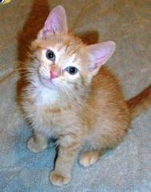

In [12]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [13]:
# hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [14]:
# hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data=["images/chapter1_cat_example.jpg"])

In [15]:
img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999978
